In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_2229/1042931510.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


False
False
False
False
False
False
False


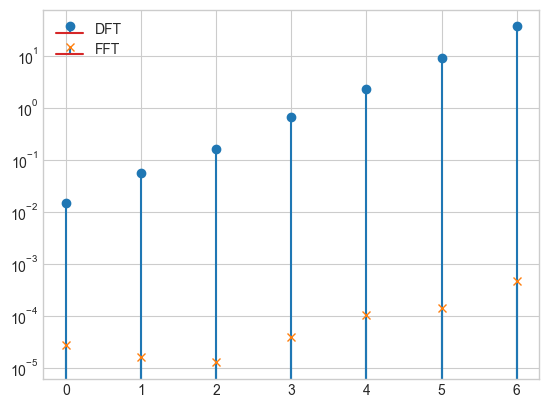

In [32]:
matrix_size = [128, 256, 512, 1024, 2048, 4096, 8192]

def initFourier(N: int) -> np.array:
    F: np.array = np.empty((N, N), dtype='complex128')
    for i in range(N):
        for k in range(N):
            F[i][k] = np.exp(2 * np.pi * i * 1j * k / N)

    return F
#
index = [0, 1, 2, 3, 4, 5, 6]
time_vector_0 = []
time_vector_1 = []

for n in matrix_size:
    t = np.linspace(0, 1, n)
    sin = np.sin(2*np.pi * t)
    t0 = time.time()
    ret1 = np.matmul(initFourier(n), sin)
    t0_fin = time.time() - t0
    time_vector_0.append(t0_fin)

    t0 = time.time()
    ret2 = np.fft.fft(sin)
    t1_fin = time.time() - t0
    time_vector_1.append(t1_fin)
    print(np.linalg.norm(np.abs(ret1 - ret2)) < 0.0001)



plt.yscale('log')
plt.stem(index, time_vector_0, label='DFT')
plt.stem(index, time_vector_1, label='FFT', markerfmt='C1x')
plt.legend()

plt.show()